In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn

In [45]:
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [47]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

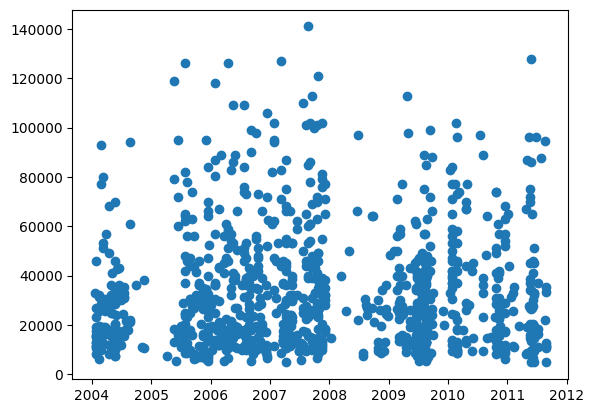

In [56]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

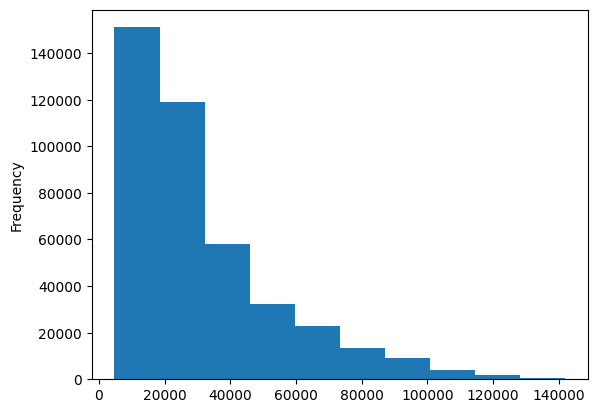

In [49]:
df.SalePrice.plot.hist()

In [ ]:
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=0,parse_dates=["saledate"])

In [28]:
df.saledate.dtype

dtype('<M8[ns]')

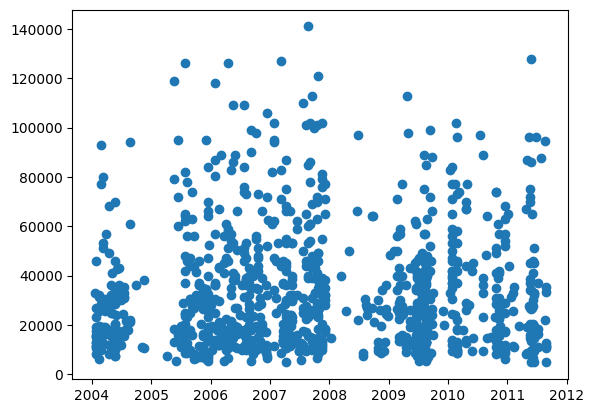

In [29]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [30]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [31]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [57]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df['saleYear'] = df.saledate.dt.year
df['saleMonth'] = df.saledate.dt.month
df['saleDay'] = df.saledate.dt.day
df['saleDayOfWeek'] = df.saledate.dt.dayofweek
df['saleDayOfYear'] = df.saledate.dt.dayofyear


In [60]:
df.shape[1]

58

In [61]:
df.drop("saledate",axis=1,inplace=True)

In [62]:
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [63]:
len(df)

412698

In [66]:
pd.api.types.is_object_dtype(df['UsageBand'])

True

In [71]:
# Find the columns which contain strings
[label for label, content in df.items() if pd.api.types.is_object_dtype(content)]

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [72]:
# Convert all columns with string values into category values
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [43]:
"""from sklearn.ensemble import RandomForestRegressor
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()"""

'from sklearn.ensemble import RandomForestRegressor\nfor label,content in df.items():\n    if not pd.api.types.is_numeric_dtype(content):\n        df[label]=content.astype("category").cat.as_ordered()'

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [54]:
df.isnull().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [75]:
df.to_csv("bluebook-for-bulldozers/train_tmp.csv",index=False)

In [84]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [85]:
df.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [86]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


In [81]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [82]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [87]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [83]:
df.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [88]:
# Check how many examples were missing
df.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [90]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content) and content.isnull().sum():
        print(label, content.isnull().sum())


UsageBand 339028
fiSecondaryDesc 140727
fiModelSeries 354031
fiModelDescriptor 337882
ProductSize 216605
Drive_System 305611
Enclosure 334
Forks 214983
Pad_Type 331602
Ride_Control 259970
Stick 331602
Transmission 224691
Turbocharged 331602
Blade_Extension 386715
Blade_Width 386715
Enclosure_Type 386715
Engine_Horsepower 386715
Hydraulics 82565
Pushblock 386715
Ripper 305753
Scarifier 386704
Tip_Control 386715
Tire_Size 315060
Coupler 192019
Coupler_System 367724
Grouser_Tracks 367823
Hydraulics_Flow 367823
Track_Type 310505
Undercarriage_Pad_Width 309782
Stick_Length 310437
Thumb 310366
Pattern_Changer 310437
Grouser_Type 310505
Backhoe_Mounting 331986
Blade_Type 330823
Travel_Controls 330821
Differential_Type 341134
Steering_Controls 341176


In [91]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"]=pd.isnull(content)
        df[label]=pd.Categorical(content).codes+1

In [92]:
pd.Categorical(df.state).codes

array([ 0, 32, 31, ...,  8, 43,  8], dtype=int8)

In [94]:
pd.Categorical(df['UsageBand']).codes

array([2, 2, 1, ..., 0, 0, 0], dtype=int8)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 70.1 MB


In [64]:
df.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [96]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [97]:
df_val = df[df.saleYear == 2012]
df_train = df[df.saleYear != 2012]

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [98]:
# Create evaluation function RMSLE

def rmsle(y_true, y_pred):
    """
    Calculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Create function to evaluate model on a few different levels
def show_scores(model):
    """
    Shows scoring metrics for different data sets.
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

In [99]:
rf_clf = RandomForestRegressor(n_jobs=-1,
                                 random_state=42,
                                 max_samples=10000)

In [100]:
%%time
rf_clf.fit(X_train, y_train)

CPU times: total: 1min 14s
Wall time: 13.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [104]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np  # Needed for np.sqrt in rmsle

rf_clf_scores = show_scores(rf_clf)
rf_clf_scores

{'Training MAE': 5554.061618822063,
 'Valid MAE': 7139.615822172297,
 'Training RMSLE': np.float64(0.25758465681614984),
 'Valid RMSLE': np.float64(0.29248380187626777),
 'Training R^2': 0.8608402371243158,
 'Valid R^2': 0.83308596217853}

In [105]:
# Make pipeline with PCA and RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=20, whiten=True, random_state=42)
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
pca_rf_model = make_pipeline(pca, rf)

In [106]:
pca_rf_model

Pipeline(steps=[('pca', PCA(n_components=20, random_state=42, whiten=True)),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [108]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {'randomforestregressor__n_estimators': np.arange(10, 1000, 50),
                 'randomforestregressor__max_depth': [None, 3, 5, 10],
                 'randomforestregressor__min_samples_split': np.arange(2, 20, 2),
                 'randomforestregressor__min_samples_leaf': np.arange(1, 20, 2)}

rf_grid = RandomizedSearchCV(pca_rf_model, rf_param_grid, cv=5, n_iter=5, verbose=True)

In [109]:
# Fit data to grid
%time

rf_grid.fit(X_train[:1000], y_train[:1000])

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca',
                                              PCA(n_components=20,
                                                  random_state=42,
                                                  whiten=True)),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=42))]),
                   n_iter=5,
                   param_distributions={'randomforestregressor__max_depth': [None,
                                                                             3,
                                                                             5,
                                                                             10],
                                        'randomforestregressor__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'randomforestregressor__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'randomforestregressor__n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [110]:
rf_grid.best_params_

{'randomforestregressor__n_estimators': np.int64(710),
 'randomforestregressor__min_samples_split': np.int64(8),
 'randomforestregressor__min_samples_leaf': np.int64(1),
 'randomforestregressor__max_depth': None}

In [111]:
pca_rf_tuned_model = rf_grid.best_estimator_
pca_rf_tuned_model.score(X_valid, y_valid)

-3.4370129033192933

In [112]:
show_scores(pca_rf_tuned_model)

{'Training MAE': 48161.07906617987,
 'Valid MAE': 50281.783745698536,
 'Training RMSLE': np.float64(1.341181817491299),
 'Valid RMSLE': np.float64(1.335724292939334),
 'Training R^2': -4.1744414090006465,
 'Valid R^2': -3.4370129033192933}

In [113]:
# Instantiate Random Forest Regressor with subset of data
rf_clf = RandomForestRegressor(n_jobs=-1,
                                 random_state=42)

In [114]:
# create hyperparameter grid for RandomForest
rf_param_grid = {'n_estimators': np.arange(10, 1000, 50),
                 'max_depth': [None, 3, 5, 10],
                 'min_samples_split': np.arange(2, 20, 2),
                 'min_samples_leaf': np.arange(1, 20, 2),
                 'max_features': [0.5, 1, 'sqrt', 'auto'],
                 'max_samples': [10000]}

rs_rf = RandomizedSearchCV(rf_clf,
                           rf_param_grid,
                           cv=2,
                           n_iter=5,
                           verbose=True)

In [115]:
# Fit model
%time

rs_rf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Shivagya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shivagya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shivagya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Shivagya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklea

RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [116]:
rs_rf.best_estimator_, rs_rf.best_params_

(RandomForestRegressor(max_features='sqrt', max_samples=10000,
                       min_samples_leaf=np.int64(13),
                       min_samples_split=np.int64(16),
                       n_estimators=np.int64(960), n_jobs=-1, random_state=42),
 {'n_estimators': np.int64(960),
  'min_samples_split': np.int64(16),
  'min_samples_leaf': np.int64(13),
  'max_samples': 10000,
  'max_features': 'sqrt',
  'max_depth': None})

In [117]:
rs_rf_best = rs_rf.best_estimator_

In [118]:
rs_rf_best_scores = show_scores(rs_rf_best)
rs_rf_best_scores

{'Training MAE': 8407.745075092776,
 'Valid MAE': 9962.914576298926,
 'Training RMSLE': np.float64(0.3701741299571314),
 'Valid RMSLE': np.float64(0.3990184012820009),
 'Training R^2': 0.7126962208028036,
 'Valid R^2': 0.7084196808643644}

In [119]:
%%time

# Ideal hyperparameters
ideal_rf = RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)
ideal_rf.fit(X_train, y_train)

CPU times: total: 4min 57s
Wall time: 51.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [120]:
show_scores(ideal_rf)

{'Training MAE': 2951.123355082265,
 'Valid MAE': 5966.934781951541,
 'Training RMSLE': np.float64(0.144427431435229),
 'Valid RMSLE': np.float64(0.246251621813037),
 'Training R^2': 0.9589090179371786,
 'Valid R^2': 0.8819835895768973}

In [121]:
rf_clf_scores

{'Training MAE': 5554.061618822063,
 'Valid MAE': 7139.615822172297,
 'Training RMSLE': np.float64(0.25758465681614984),
 'Valid RMSLE': np.float64(0.29248380187626777),
 'Training R^2': 0.8608402371243158,
 'Valid R^2': 0.83308596217853}

In [122]:
df_test = pd.read_csv('Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])

df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [124]:
def preprocess_data(df):
    
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    df.drop('saledate', axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1
        
    return df

In [125]:
df_test_tmp = preprocess_data(df_test)
df_test_tmp.shape

(12457, 101)

In [126]:
y_preds = ideal_rf.predict(df_test_tmp)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [127]:
set(X_train.columns) - set(df_test_tmp.columns)

{'auctioneerID_is_missing'}

In [130]:
df_test_tmp['auctioneerID_is_missing'] = False
df_test_tmp.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [132]:
X_train.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [136]:
df_test_tmp = df_test_tmp[X_train.columns]
test_preds = ideal_rf.predict(df_test_tmp) 


In [137]:
test_preds

array([17323.79069043, 17166.79798407, 51431.26491442, ...,
       12399.80794922, 16979.39675127, 27062.36886536])

In [138]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test_tmp['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17323.790690
1,1227844,17166.797984
2,1227847,51431.264914
3,1227848,70764.995455
4,1227863,57971.058208
...,...,...
12452,6643171,42387.776009
12453,6643173,13221.150662
12454,6643184,12399.807949
12455,6643186,16979.396751


In [139]:
df_preds.to_csv('test_predictions.csv')

In [140]:
len(ideal_rf.feature_importances_)

102

In [141]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(df.features[:n], df.feature_importances[:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis();

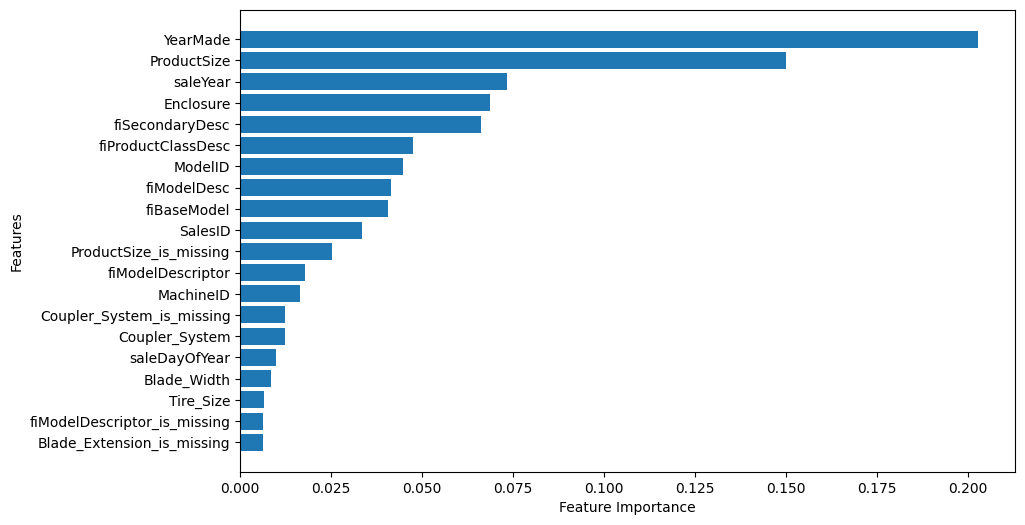

In [142]:
plot_features(X_train.columns, ideal_rf.feature_importances_)

In [143]:
df['ProductSize'].value_counts()

ProductSize
0    216605
4     64342
3     51297
6     27057
5     25721
2     21396
1      6280
Name: count, dtype: int64